In [10]:
import numpy as np
import pandas as pd

In [18]:
from google.colab import files
uploaded = files.upload()

Saving df14.csv to df14.csv


In [19]:
#from google.colab import drive
# Mount google Drive
#drive.mount('/content/MyDrive/')

In [20]:
# Define the path to the excel file (replace with your file path on Google Drive)

#file_path = '/content/MyDrive/MyDrive/df14.csv'

In [21]:
# Read the .csv file into a DataFrame
df14 = pd.read_csv('df14.csv')

In [22]:
# Display the first few rows of the DataFrame
print(df14.head())

              Datetime        NO2       PM10     PM2.5     RH       Temp  \
0  2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.84  20.880000   
1  2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.84  21.116667   
2  2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.84  20.716667   
3  2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.84  20.383333   
4  2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.84  20.466667   

           WD        WS  
0   80.880000  0.300000  
1  152.250000  0.233333  
2  163.016667  0.266667  
3   55.550000  0.233333  
4   33.583333  0.250000  


In [23]:
# Calculate the percentage of missing values per column
missing_percentage = df14.isnull().mean() * 100

# Print the missing percentage per column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Datetime    0.0
NO2         0.0
PM10        0.0
PM2.5       0.0
RH          0.0
Temp        0.0
WD          0.0
WS          0.0
dtype: float64


<ipython-input-24-bc3d5d0f7ca9>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df14.resample('Y').mean()


Yearly Percentage Change:
            NO2_change_%  PM10_change_%  PM2.5_change_%
Datetime                                               
2018-12-31           NaN            NaN             NaN
2019-12-31     -7.069533       0.747204        5.833904
2020-12-31    -12.538344      -5.985530      -11.930425
2021-12-31    103.211911      19.407702       20.142561
2022-12-31    -52.089315       2.274505        6.451632
2023-12-31    -66.779102      -4.851995       -3.641162


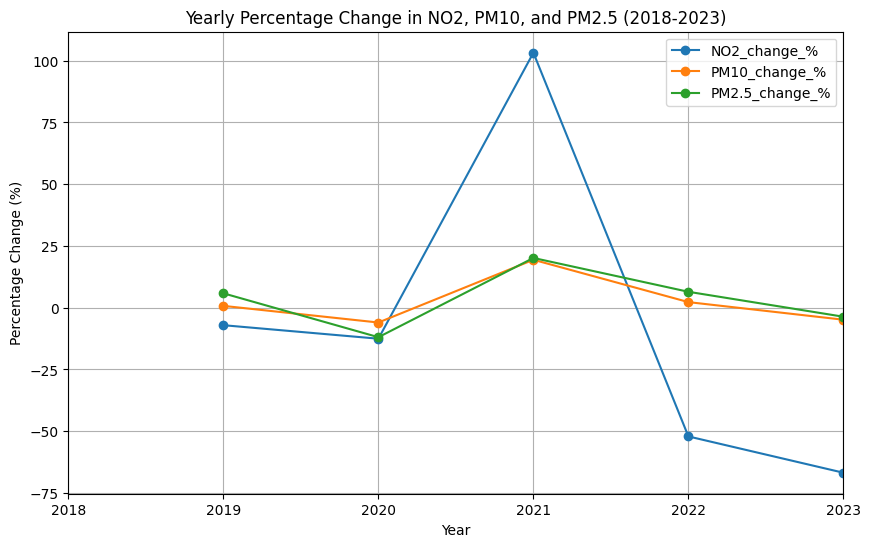

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is in proper format
df14['Datetime'] = pd.to_datetime(df14['Datetime'])

# Set datetime as index for easier analysis
df14.set_index('Datetime', inplace=True)

# Resample data yearly to calculate yearly means
yearly_data = df14.resample('Y').mean()

# Calculate percentage change for NO2, PM10, and PM2.5
yearly_data['NO2_change_%'] = yearly_data['NO2'].pct_change() * 100
yearly_data['PM10_change_%'] = yearly_data['PM10'].pct_change() * 100
yearly_data['PM2.5_change_%'] = yearly_data['PM2.5'].pct_change() * 100

# Print the results
print("Yearly Percentage Change:")
print(yearly_data[['NO2_change_%', 'PM10_change_%', 'PM2.5_change_%']])

# Plot the percentage changes
yearly_data[['NO2_change_%', 'PM10_change_%', 'PM2.5_change_%']].plot(
    figsize=(10, 6),
    title='Yearly Percentage Change in NO2, PM10, and PM2.5 (2018-2023)',
    marker='o'
)
plt.ylabel('Percentage Change (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


Yearly Percentage Change in Pollution Levels:
                  NO2       PM10      PM2.5
Datetime                                  
2018             NaN        NaN        NaN
2019       -7.069533   0.747204   5.833904
2020      -12.538344  -5.985530 -11.930425
2021      103.211911  19.407702  20.142561
2022      -52.089315   2.274505   6.451632
2023      -66.779102  -4.851995  -3.641162


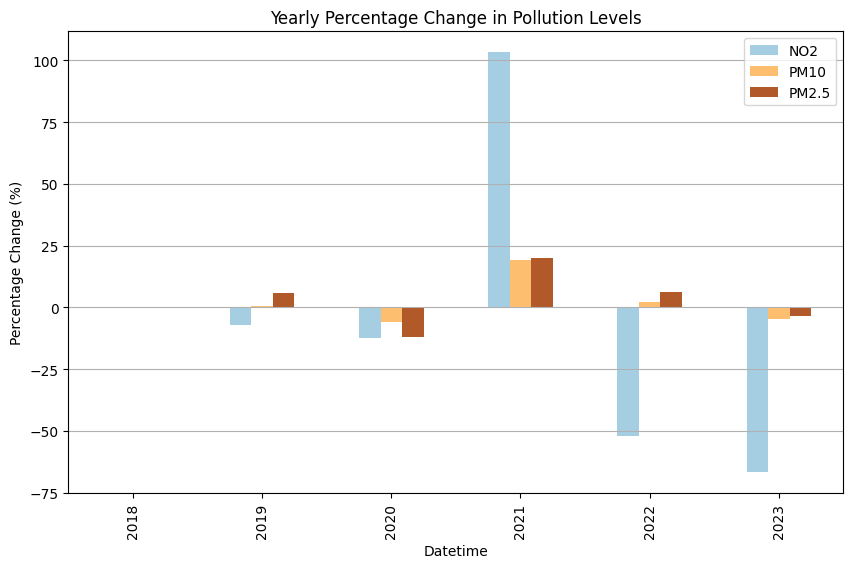

In [25]:
#Yearly Pollution Reduction (if any)
# Calculate yearly average first
yearly_avg = df14.groupby(df14.index.year)[['NO2', 'PM10', 'PM2.5']].mean() # Assuming 'df14' has a DatetimeIndex

# Calculate yearly percentage change
pollution_change = yearly_avg.pct_change() * 100
print("Yearly Percentage Change in Pollution Levels:\n", pollution_change)

# Plot percentage change
pollution_change.plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title('Yearly Percentage Change in Pollution Levels')
plt.ylabel('Percentage Change (%)')
plt.grid(axis='y')
plt.show()

In [26]:
# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
corr_matrix = df14[['NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Parameters')
plt.show()

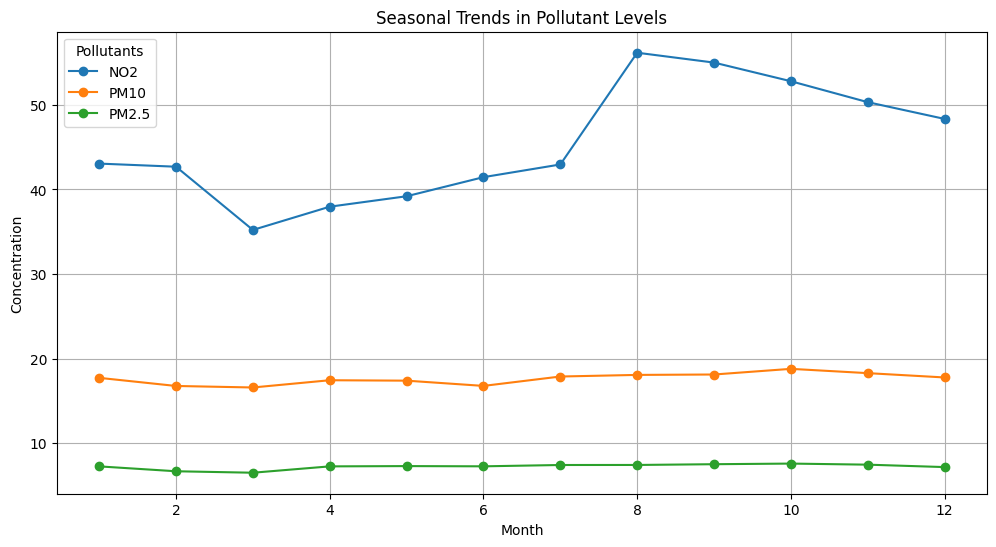

In [27]:
#SEASONAL TRENDS

# Add time-based features
# Convert 'Datetime' column to DatetimeIndex if it's not already
if not isinstance(df14.index, pd.DatetimeIndex):
    df14['Datetime'] = pd.to_datetime(df14['Datetime'])  # Assuming 'Datetime' column exists
    df14.set_index('Datetime', inplace=True)

df14['Year'] = df14.index.year
df14['Month'] = df14.index.month
df14['Hour'] = df14.index.hour
df14['DayOfWeek'] = df14.index.dayofweek


# Average pollutant levels per month
monthly_avg = df14.groupby('Month')[['NO2', 'PM10', 'PM2.5']].mean()

# Plot seasonal trends
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Seasonal Trends in Pollutant Levels')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend(title='Pollutants')
plt.grid()
plt.show()


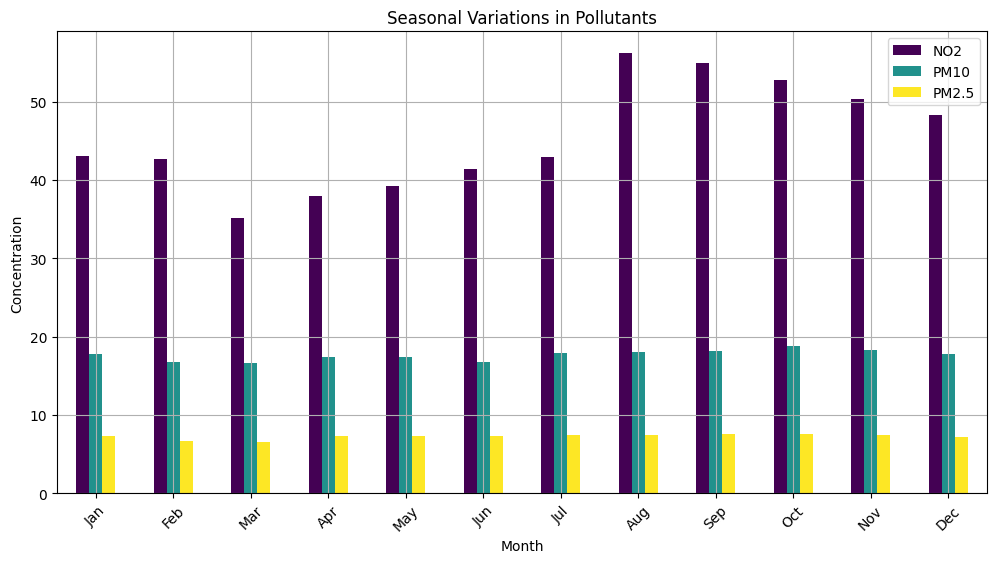

In [28]:
# Seasonal average levels (group by Month)
seasonal_avg = df14.groupby('Month')[['NO2', 'PM10', 'PM2.5']].mean()

# Plot seasonal trends
seasonal_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Seasonal Variations in Pollutants')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid()
plt.show()

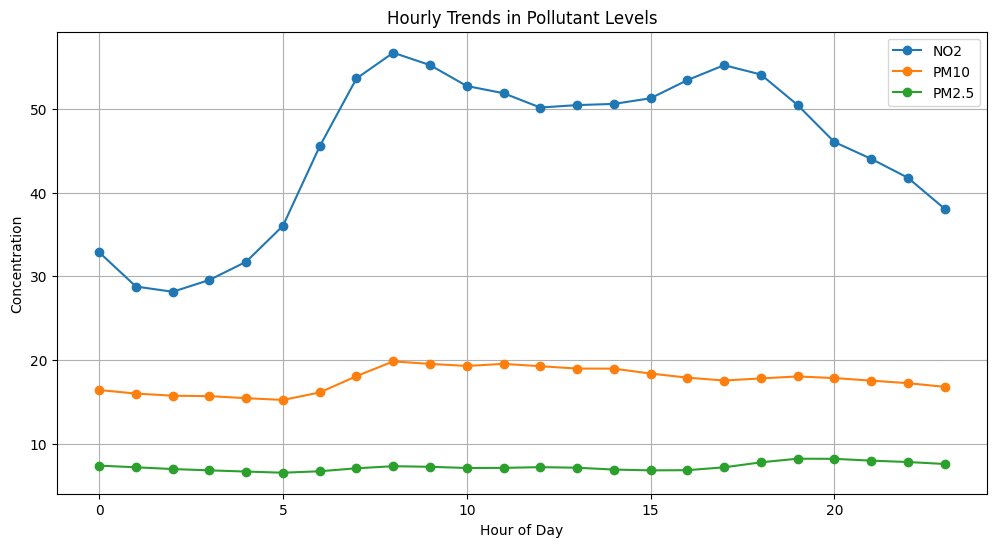

In [29]:
# Hourly averages (Hourly and Weekly Trends)
hourly_avg = df14.groupby('Hour')[['NO2', 'PM10', 'PM2.5']].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Hourly Trends in Pollutant Levels')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration')
plt.grid()
plt.show()

In [30]:
# Identify high pollution periods (e.g., PM2.5 > 50)
extreme_events = df14[df14['PM2.5'] > 25]

plt.figure(figsize=(12, 6))
plt.plot(df14.index, df14['PM2.5'], label='PM2.5', alpha=0.7)
plt.scatter(extreme_events.index, extreme_events['PM2.5'], color='red', label='High PM2.5 (>25)')
plt.title('Pollution Spikes in PM2.5')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid()
plt.show()


In [31]:
# Identify high pollution periods (e.g., PM10 > 50)
extreme_events_pm10 = df14[df14['PM10'] > 50]

plt.figure(figsize=(12, 6))
plt.plot(df14.index, df14['PM10'], label='PM10', alpha=0.7)
plt.scatter(extreme_events_pm10.index, extreme_events_pm10['PM10'], color='red', label='High PM10 (>50)')
plt.title('Pollution Spikes in PM10')
plt.xlabel('Datetime')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid()
plt.show()


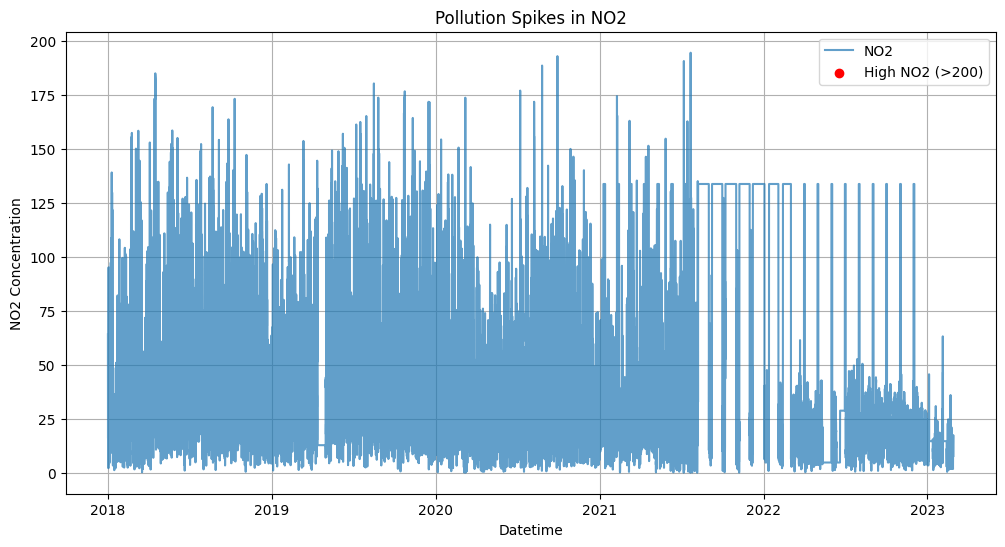

In [32]:
# Identify high pollution periods (e.g., NO2 > 200)
extreme_events = df14[df14['NO2'] > 200]

plt.figure(figsize=(12, 6))
plt.plot(df14.index, df14['NO2'], label='NO2', alpha=0.7)
plt.scatter(extreme_events.index, extreme_events['NO2'], color='red', label='High NO2 (>200)')
plt.title('Pollution Spikes in NO2')
plt.xlabel('Datetime')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.grid()
plt.show()

In [33]:
pip install Windrose

In [34]:
#wind direction influence
from windrose import WindroseAxes
# Wind rose visualization
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df14['WD'], df14['NO2'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose for NO2 Levels')
plt.show()

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

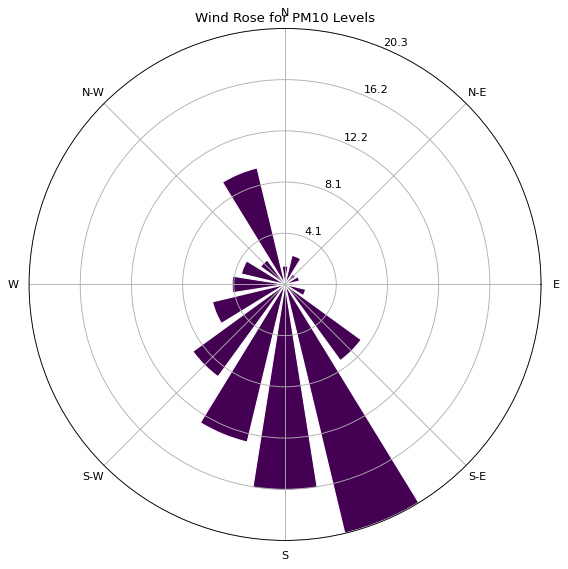

In [35]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Wind rose visualization for PM10
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df14['WD'], df14['PM10'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose for PM10 Levels')
plt.show()


In [36]:
# Wind rose visualization for PM2.5
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df14['WD'], df14['PM2.5'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose for PM2.5 Levels')
plt.show()


<Figure size 800x800 with 0 Axes>

In [37]:
df14.columns

Index(['NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS', 'Year', 'Month',
       'Hour', 'DayOfWeek'],
      dtype='object')

In [38]:
# Wind speed vs. NO2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='NO2', data=df14, hue='NO2', palette='viridis')  # Hue uses NO2 for color intensity
plt.title('Wind Speed vs. NO2 Levels')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('NO2 Concentration')
plt.grid()
plt.show()

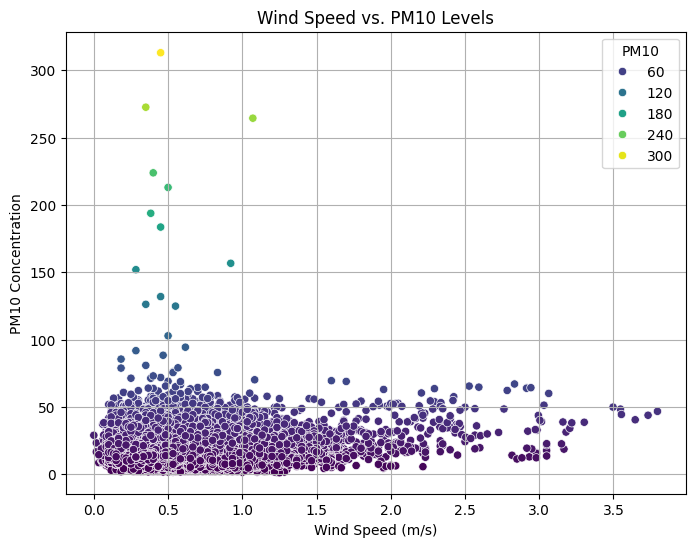

In [39]:
# Wind speed vs. PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='PM10', data=df14, hue='PM10', palette='viridis')
plt.title('Wind Speed vs. PM10 Levels')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10 Concentration')
plt.grid()
plt.show()

In [40]:
# Wind speed vs. PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='PM2.5', data=df14, hue='PM2.5', palette='viridis')  # Hue uses PM2.5 for color intensity
plt.title('Wind Speed vs. PM2.5 Levels')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration')
plt.grid()
plt.show()

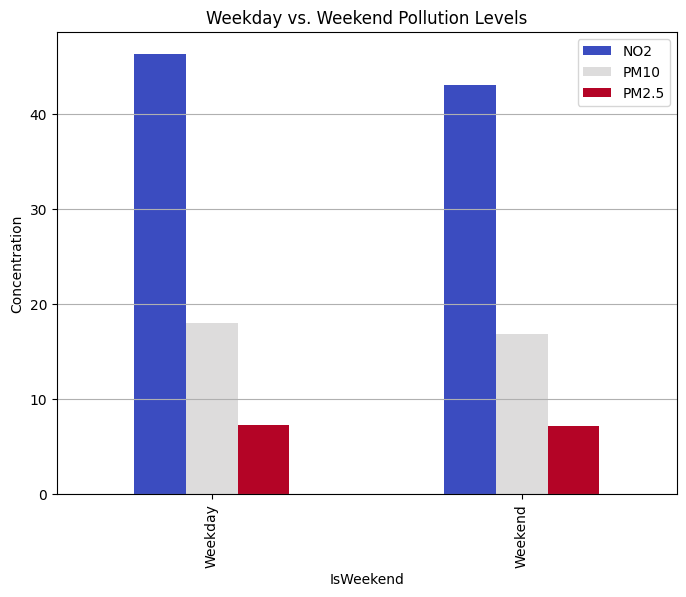

In [41]:
# Add a column for weekend/weekday
df14['IsWeekend'] = df14['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average pollutant levels by weekend/weekday
weekend_avg = df14.groupby('IsWeekend')[['NO2', 'PM10', 'PM2.5']].mean()

# Plot weekday vs. weekend
weekend_avg.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Weekday vs. Weekend Pollution Levels')
plt.ylabel('Concentration')
plt.grid(axis='y')
plt.show()

In [42]:
# Compute AQI Categories
def compute_aqi(value, breakpoints):
    for bp in breakpoints:
        if bp[0] <= value <= bp[1]:
            return bp[2]
    return None

# Example breakpoints for NO2 (simplified WHO guidelines)
no2_breakpoints = [(0, 50, 'Good'), (51, 100, 'Moderate'), (101, 200, 'Unhealthy')]

# Apply the function to compute AQI categories
df14['NO2_AQI'] = df14['NO2'].apply(lambda x: compute_aqi(x, no2_breakpoints))

# Count frequencies and calculate percentages
aqi_counts = df14['NO2_AQI'].value_counts()
total = aqi_counts.sum()
aqi_percentages = (aqi_counts / total * 100).round(2)  # Calculate percentages

# Plot AQI distribution with percentages
plt.figure(figsize=(8, 6))
bars = aqi_counts.plot(kind='bar', color=['green', 'yellow', 'red'], alpha=0.8)
plt.title('AQI Distribution for NO2')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Add percentages as labels on top of the bars
for i, value in enumerate(aqi_counts):
    plt.text(i, value + total * 0.01, f"{aqi_percentages[i]}%", ha='center', fontsize=10, color='black')

plt.show()

<ipython-input-42-39bc59c9a071>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, value + total * 0.01, f"{aqi_percentages[i]}%", ha='center', fontsize=10, color='black')


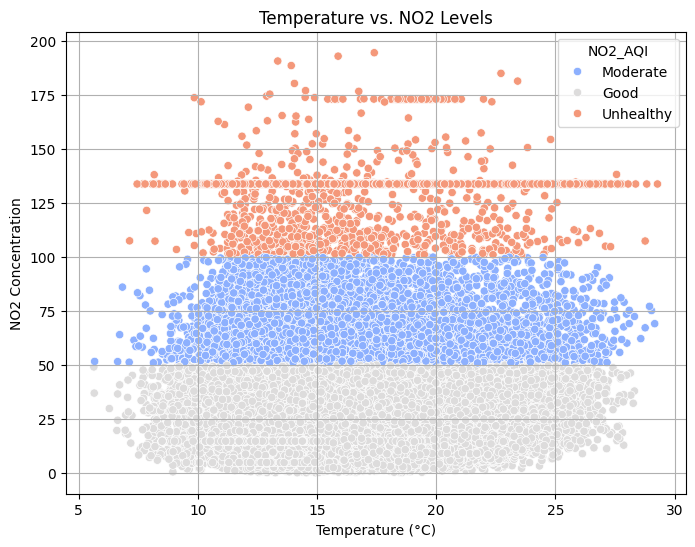

In [43]:
#Pollution and Weather Conditions
# Scatter plot: Temperature vs. NO2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp', y='NO2', data=df14, hue='NO2_AQI', palette='coolwarm')
plt.title('Temperature vs. NO2 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('NO2 Concentration')
plt.grid()
plt.show()


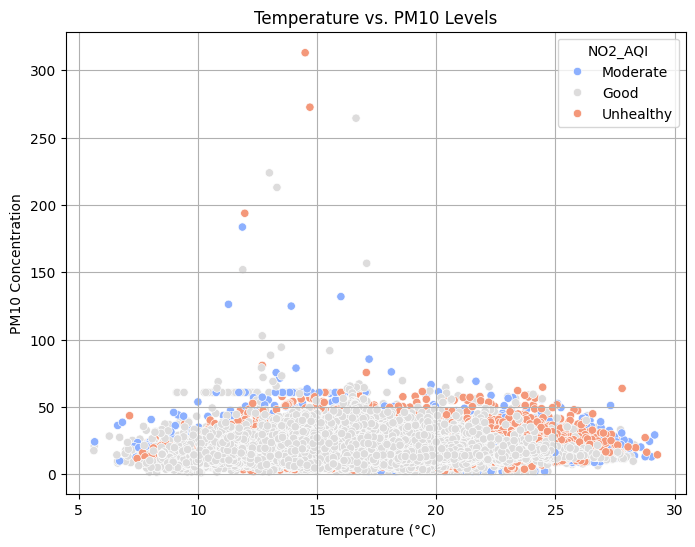

In [44]:
# Scatter plot: Temperature vs. PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp', y='PM10', data=df14, hue='NO2_AQI', palette='coolwarm')  # You can change the hue if needed
plt.title('Temperature vs. PM10 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM10 Concentration')
plt.grid()
plt.show()

In [45]:
# Scatter plot: Temperature vs. PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp', y='PM2.5', data=df14, hue='NO2_AQI', palette='coolwarm')  # You can change the hue if needed
plt.title('Temperature vs. PM2.5 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.grid()
plt.show()

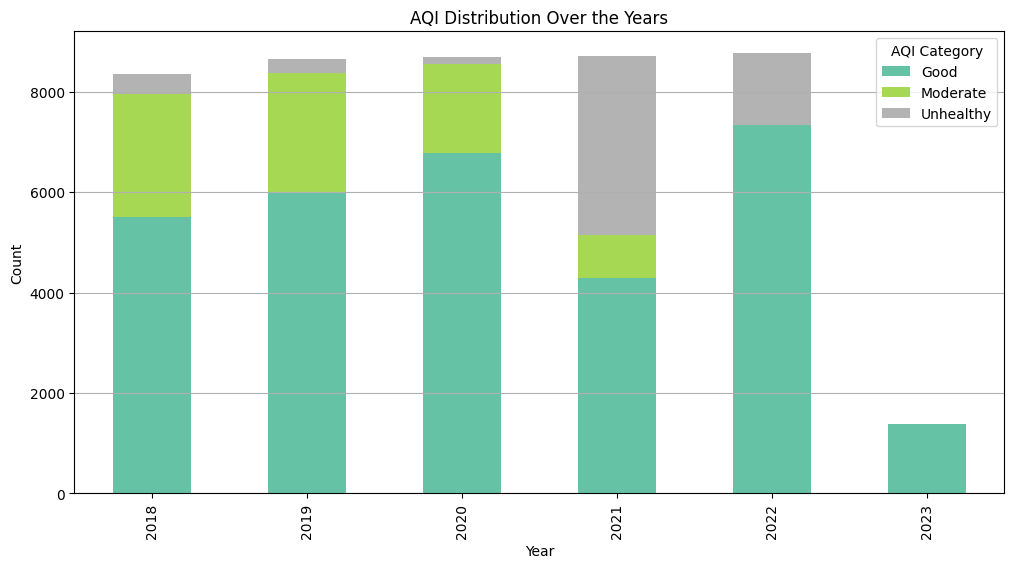

In [46]:
# Count AQI categories per year
aqi_trends = df14.groupby('Year')['NO2_AQI'].value_counts().unstack()

# Plot AQI category distribution
aqi_trends.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('AQI Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='AQI Category')
plt.grid(axis='y')
plt.show()

In [47]:
# Pollution Hotspots by Time of Day
# Top 5 highest NO2 hours
top_no2_hours = df14.groupby('Hour')['NO2'].mean().sort_values(ascending=False).head(5)
print("Top 5 hours with highest NO2 levels:\n", top_no2_hours)

# Visualize
top_no2_hours.plot(kind='bar', color='red', figsize=(8, 6))
plt.title('Top 5 Hours with Highest NO2 Levels')
plt.xlabel('Hour')
plt.ylabel('NO2 Concentration')
plt.grid()
plt.show()

Top 5 hours with highest NO2 levels:
 Hour
8     56.716743
9     55.239273
17    55.230726
18    54.113541
7     53.639965
Name: NO2, dtype: float64


In [48]:
df14.columns


Index(['NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS', 'Year', 'Month',
       'Hour', 'DayOfWeek', 'IsWeekend', 'NO2_AQI'],
      dtype='object')

In [49]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44931 entries, 2018-01-01 00:00:00 to 2023-02-27 23:00:00
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO2        44931 non-null  float64
 1   PM10       44931 non-null  float64
 2   PM2.5      44931 non-null  float64
 3   RH         44931 non-null  float64
 4   Temp       44931 non-null  float64
 5   WD         44931 non-null  float64
 6   WS         44931 non-null  float64
 7   Year       44931 non-null  int32  
 8   Month      44931 non-null  int32  
 9   Hour       44931 non-null  int32  
 10  DayOfWeek  44931 non-null  int32  
 11  IsWeekend  44931 non-null  object 
 12  NO2_AQI    44542 non-null  object 
dtypes: float64(7), int32(4), object(2)
memory usage: 4.1+ MB
